<a href="https://colab.research.google.com/github/annapoorna-a-k/MathematicsProject-s1/blob/main/Student_Grade_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

mat_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/PROJECT/'+"student-mat.csv")

mat_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,Ssupport,Gsupport,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,mother,2,2,0,yes,no,no,no,no,3,4,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,father,1,2,0,no,yes,no,no,yes,3,3,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,mother,1,2,3,yes,no,yes,no,yes,3,2,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,mother,1,3,0,no,yes,yes,yes,yes,2,2,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,father,1,2,0,no,yes,yes,no,no,3,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,other,1,2,2,no,yes,yes,no,no,5,4,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,mother,2,1,0,no,no,no,no,yes,4,5,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,other,1,1,3,no,no,no,no,no,5,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,mother,3,1,0,no,no,no,no,yes,4,1,5,0,11,12,10


# Data Exploration

In [33]:
print('Total number of students: ',len(mat_data))

Total number of students:  395


In [34]:
print("Parameter are: ",mat_data.columns)

Parameter are:  Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'failures',
       'Ssupport', 'Gsupport', 'feespaid', 'ecactivities', 'internet',
       'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [35]:
mat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        395 non-null    object
 1   sex           395 non-null    object
 2   age           395 non-null    int64 
 3   address       395 non-null    object
 4   famsize       395 non-null    object
 5   Pstatus       395 non-null    object
 6   Medu          395 non-null    int64 
 7   Fedu          395 non-null    int64 
 8   Mjob          395 non-null    object
 9   Fjob          395 non-null    object
 10  guardian      395 non-null    object
 11  traveltime    395 non-null    int64 
 12  studytime     395 non-null    int64 
 13  failures      395 non-null    int64 
 14  Ssupport      395 non-null    object
 15  Gsupport      395 non-null    object
 16  feespaid      395 non-null    object
 17  ecactivities  395 non-null    object
 18  internet      395 non-null    object
 19  freetime

In [36]:
mat_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [37]:
mat_data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

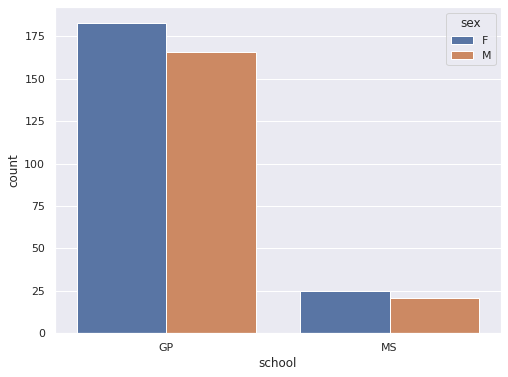

In [38]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x="school", hue ="sex", data=mat_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


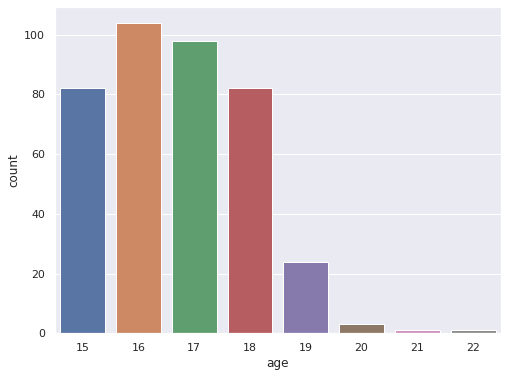

In [39]:
sns.countplot(mat_data.age)

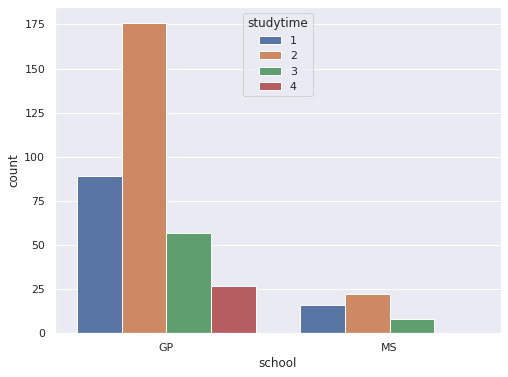

In [40]:
sns.countplot(x="school", hue ="studytime", data=mat_data)

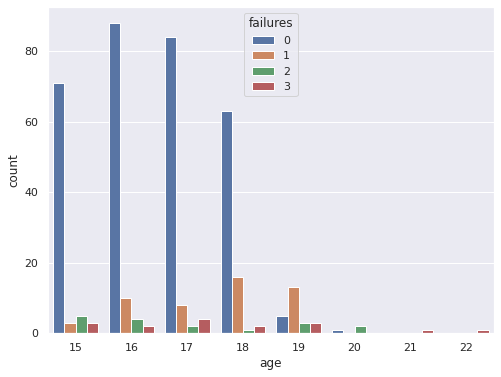

In [41]:
sns.countplot(x="age", hue="failures", data=mat_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


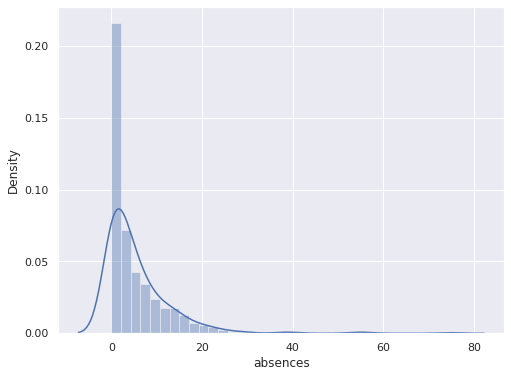

In [42]:
sns.distplot(mat_data.absences)

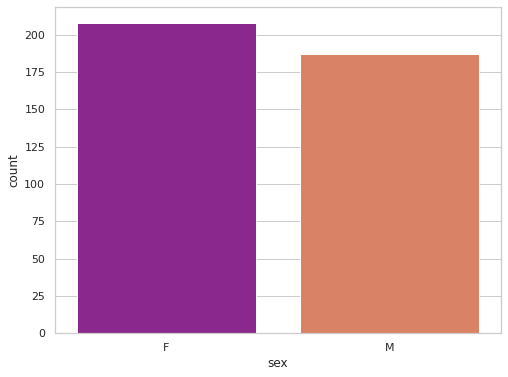

In [43]:
sns.set_style('whitegrid')    
sns.countplot(x='sex',data=mat_data,palette='plasma')

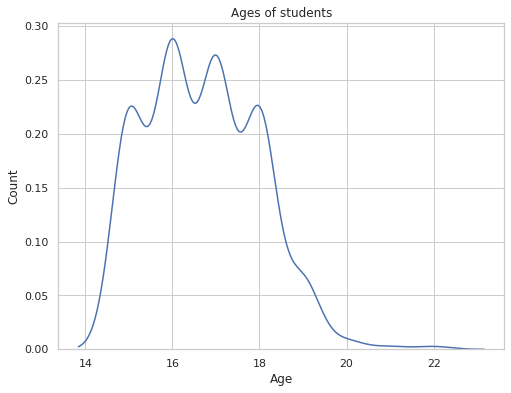

In [44]:
b = sns.kdeplot(mat_data['age']) 
b.axes.set_title('Ages of students')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

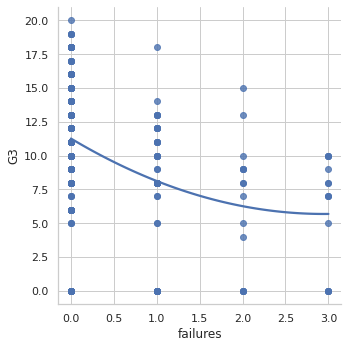

In [45]:
sns.lmplot(x ="failures", y ="G3", data = mat_data, order = 2, ci = None)

In [46]:
mat_data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


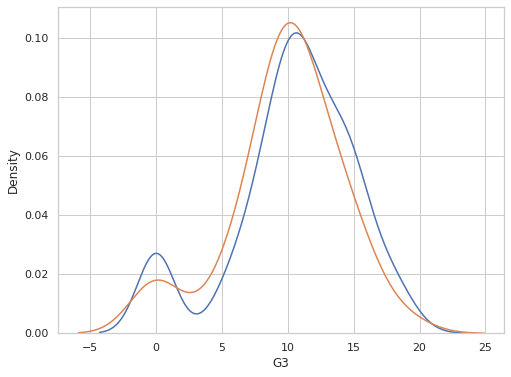

In [47]:
GP = mat_data[mat_data.school == 'GP']
MS = mat_data[mat_data.school == 'MS']

sns.distplot(GP.G3, hist=False, label="GP")
sns.distplot(MS.G3, hist=False, label="MS")
plt.show()

Encoding categorical variables

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mat_data.iloc[:,0]=le.fit_transform(mat_data.iloc[:,0])
mat_data.iloc[:,1]=le.fit_transform(mat_data.iloc[:,1])
mat_data.iloc[:,3]=le.fit_transform(mat_data.iloc[:,3])
mat_data.iloc[:,4]=le.fit_transform(mat_data.iloc[:,4])
mat_data.iloc[:,5]=le.fit_transform(mat_data.iloc[:,5])
mat_data.iloc[:,7]=le.fit_transform(mat_data.iloc[:,7])
mat_data.iloc[:,8]=le.fit_transform(mat_data.iloc[:,8])
mat_data.iloc[:,9]=le.fit_transform(mat_data.iloc[:,9])
mat_data.iloc[:,10]=le.fit_transform(mat_data.iloc[:,10])
mat_data.iloc[:,11]=le.fit_transform(mat_data.iloc[:,11])
mat_data.iloc[:,5]=le.fit_transform(mat_data.iloc[:,5])
mat_data.iloc[:,13]=le.fit_transform(mat_data.iloc[:,13])
mat_data.iloc[:,14]=le.fit_transform(mat_data.iloc[:,14])
mat_data.iloc[:,15]=le.fit_transform(mat_data.iloc[:,15])
mat_data.iloc[:,16]=le.fit_transform(mat_data.iloc[:,16])
mat_data.iloc[:,17]=le.fit_transform(mat_data.iloc[:,17])
mat_data.iloc[:,18]=le.fit_transform(mat_data.iloc[:,18])
mat_data.iloc[:,19]=le.fit_transform(mat_data.iloc[:,19])
mat_data.iloc[:,20]=le.fit_transform(mat_data.iloc[:,20])
mat_data.iloc[:,21]=le.fit_transform(mat_data.iloc[:,21])
mat_data.iloc[:,22]=le.fit_transform(mat_data.iloc[:,22])

In [49]:
mat_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,Ssupport,Gsupport,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,1,1,2,0,1,0,0,0,0,2,3,2,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,2,0,0,1,0,0,1,2,2,2,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,1,0,2,3,1,0,1,0,1,2,1,2,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,0,3,0,0,1,1,1,1,1,1,4,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,0,0,2,0,0,1,1,0,0,2,1,4,4,6,10,10


# Finding Correlation between Attributes

In [50]:
mat_data.corr()['G3'].sort_values()

failures       -0.360415
age            -0.161579
goout          -0.132791
traveltime     -0.117142
Ssupport       -0.082788
guardian       -0.070109
health         -0.061335
Pstatus        -0.058009
school         -0.045017
Gsupport       -0.039157
freetime        0.011307
ecactivities    0.016100
Fjob            0.042286
absences        0.053318
famsize         0.081407
studytime       0.097820
internet        0.098483
feespaid        0.101996
Mjob            0.102082
sex             0.103456
address         0.105756
Fedu            0.152457
Medu            0.217147
G1              0.801468
G2              0.904868
G3              1.000000
Name: G3, dtype: float64

In [51]:
mat_data = mat_data.drop(['school', 'G1', 'G2'], axis='columns')

In [52]:
most_correlated = mat_data.corr().abs()['G3'].sort_values(ascending=False)
most_correlated = most_correlated[:9]
most_correlated

G3            1.000000
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
address       0.105756
sex           0.103456
Name: G3, dtype: float64

In [53]:
mat_data = mat_data.loc[:, most_correlated.index]
mat_data.head()

,G3,failures,Medu,age,Fedu,goout,traveltime,address,sex
0,6,0,4,18,4,3,1,1,0
1,6,0,1,17,1,2,0,1,0
2,10,3,1,15,1,1,0,1,0
3,15,0,4,15,2,1,0,1,0
4,10,0,3,16,3,1,0,1,0


# Grade Prediction

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mat_data, mat_data['G3'], test_size = 0.25, random_state=42)

In [55]:
X_train.head()

,G3,failures,Medu,age,Fedu,goout,traveltime,address,sex
16,14,0,4,16,4,2,0,1,0
66,12,0,4,15,4,2,0,1,1
211,13,0,4,17,4,4,0,1,1
7,6,0,4,17,4,3,1,1,0
19,10,0,4,16,3,2,0,1,1


In [56]:
X_train = X_train.drop('G3', axis='columns')
X_test = X_test.drop('G3', axis='columns')
lr = LinearRegression()
model = lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.1873869490421055


In [57]:
predictions = lr.predict(X_test)
print("Predicted Grade: ",predictions,sep = '\n')

Predicted Grade: 
[ 6.66589705  9.85235404  9.13739463 10.85300189  6.40119491 11.00101873
 12.1609245  11.63954979 10.72610509 11.97827239 12.35456738 11.49017109
 11.80062728 12.13720576 11.23895808 10.55312955 10.3523584  10.02903548
  9.02612285  9.51116239 10.74521066 11.5028198  12.19185388 10.17295761
 12.92427212 13.60756772 10.79771465 12.40985462 11.96612403 13.98084633
  8.7799549   9.84014454 11.94176617 10.54417136 10.99414078 10.15245562
  7.30932616 12.60628075 13.21634113  7.29555214  6.13427102 11.24144524
 10.81311433  7.44310091 11.38438084 12.00920176 10.10342828  8.76618088
 10.4533127  11.77132357 11.61428465 12.33136711 12.60628075 10.53202301
 10.16671878 10.15755794 11.18204519  9.90700216 13.8581235  12.86898488
 11.322716   11.94611119  2.76544977 11.12954119  7.22556824 10.04698346
  8.58027745 11.24994886 10.85625321 12.91212377 12.33136711 11.24144524
 11.5765231  12.1609245   9.89960574 11.24422848 12.44512901 12.83201059
  5.2635503  11.76969791 10.88997

Text(0, 0.5, 'Predicted Grade')

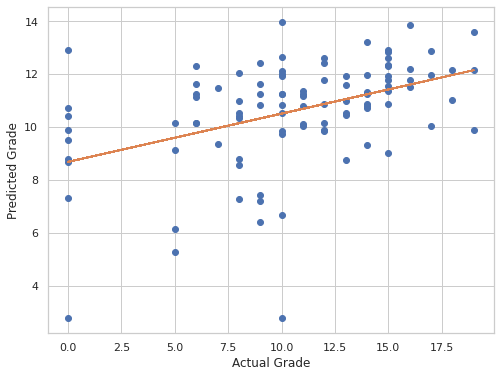

In [58]:
plt.plot(y_test, predictions, 'o')
m, b = np.polyfit(y_test,predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")